In [1]:
# !pip install py3Dmol

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
import omegaconf
import copy
import os, sys, pathlib
import pickle
import scipy

from torch_geometric.loader.dataloader import Collater


project = "EquilibriumEquiFormer"

from src.deq2ff.plotting.style import set_seaborn_style, set_style_after

# parent folder of the plot
plotfolder = "/ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/"
plotfolder = os.path.join(plotfolder, "plots")

chemical_symbols = [
    "_",
    "H",
    "He",
    "Li",
    "Be",
    "B",
    "C",
    "N",
    "O",
    "F",
    "Ne",
    "Na",
    "Mg",
    "Al",
    "Si",
    "P",
    "S",
    "Cl",
    "Ar",
    "K",
]

In [3]:
import deq2ff.plotting.plot_loss_per_idx_helper as hp

# Ethanol

### Equiformer Ethanol

In [4]:
# # Equiformer
# # Es dd ethanol 45353 gualaj93
# run_id = "gualaj93"
# datasplit = "test"

# # Es tinyl3 ethanol 45549 g4blbk99
# # run_id = "g4blbk99"


# dffp_e2_eth, dfall_e2_eth, dataset = hp.get_data(run_id, datasplit)

filename: /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plot_loss_per_idx/run-gualaj93-idx_table_test.pkl


KeyError: 'test_patch_size'

Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/f_mae_count_test-gualaj93.png
Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/f_mae_count_test-gualaj93.png


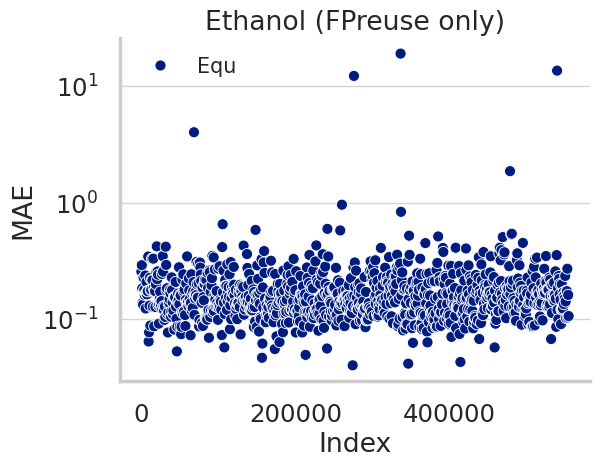

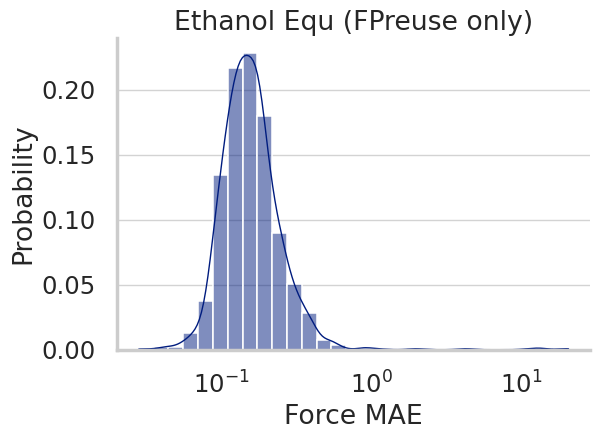

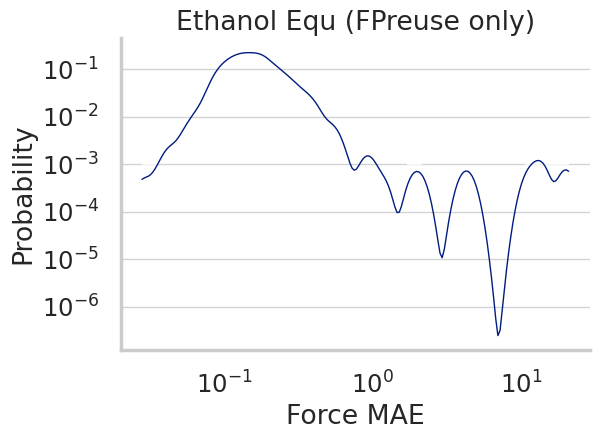

In [5]:
# fig_loss_e_ethanol = hp.plot_loss_per_idx(
#     dffp_e2_eth, dfall_e2_eth, datasplit, run_id, logy=True
# )
# hp.plot_fmae_count(
#     dffp_e2_eth, dfall_e2_eth, dataset, datasplit, run_id, wofpreuse=True
# )
# hp.plot_fmae_count(
#     dffp_e2_eth, dfall_e2_eth, dataset, datasplit, run_id, wofpreuse=True, logs=(10, 10)
# )

### DEQ Ethanol

In [6]:
# # DEQs br2dnull tinyl3 ethanol 30186 8epgifsz
# # https://wandb.ai/andreas-burger/EquilibriumEquiFormer/runs/8epgifsz
# run_id = "8epgifsz"

# # DEQs br2dnull clipgradnorm-10 lntype-ln (pre+post) ethanol 45409 qnby6afa
# # https://wandb.ai/andreas-burger/EquilibriumEquiFormer/runs/qnby6afa
# # run_id = "qnby6afa"

# # DEQc brdnull inf-bs1 target-ethanol testpatches-10000 testsize-2
# # https://wandb.ai/andreas-burger/EquilibriumEquiFormer/runs/21stuq6h
# # run_id = "21stuq6h"


# datasplit = "test_fpreuse"
# dffp_deq_eth, dfall_deq_eth, dataset = hp.get_data(run_id, datasplit)

filename: /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plot_loss_per_idx/run-8epgifsz-idx_table_test_fpreuse.pkl
Loading dataset...
Found ['datasets/md17/ethanol/raw/md17_ethanol.npz'] files, skipping download
Found ['datasets/md17/ethanol/processed/md17-ethanol.pt'] files, skipping process
Dataset: Using consecutive order
Loading data from /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plot_loss_per_idx/run-8epgifsz-idx_table_test_fpreuse.pkl
Removing non-fpreuse rows...
patch_size=2
len(df) before filtering: 2000
len(df) fpreuse only    : 1000


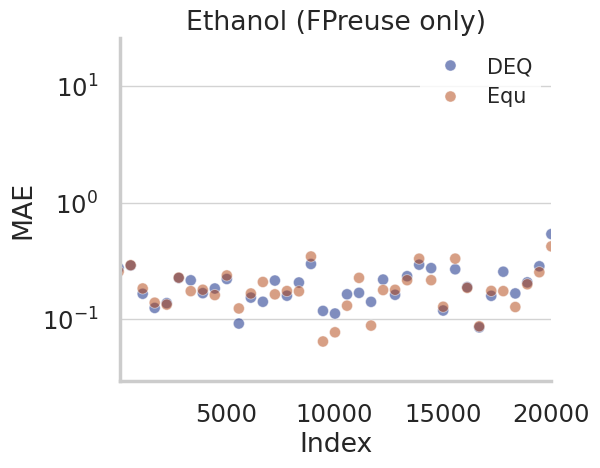

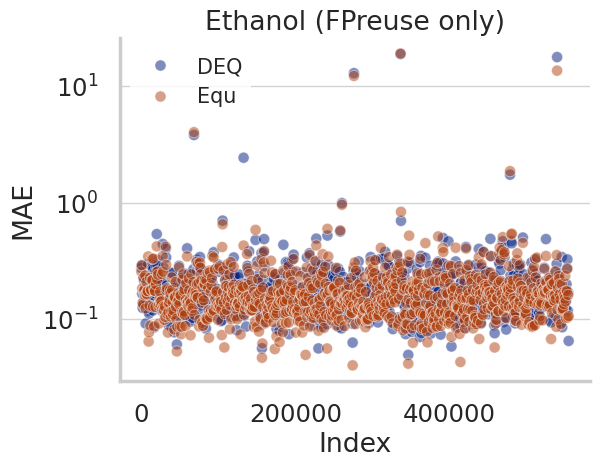

In [25]:
# _dffp = pd.concat([dffp_deq_eth, dffp_e2_eth], ignore_index=True, sort=False)
# hp.plot_loss_per_idx(
#     _dffp, dfall_deq_eth, datasplit, run_id, logy=True, alpha=0.5, xmin=100, xmax=20000
# )
# hp.plot_loss_per_idx(_dffp, dfall_deq_eth, datasplit, run_id, logy=True, alpha=0.5)

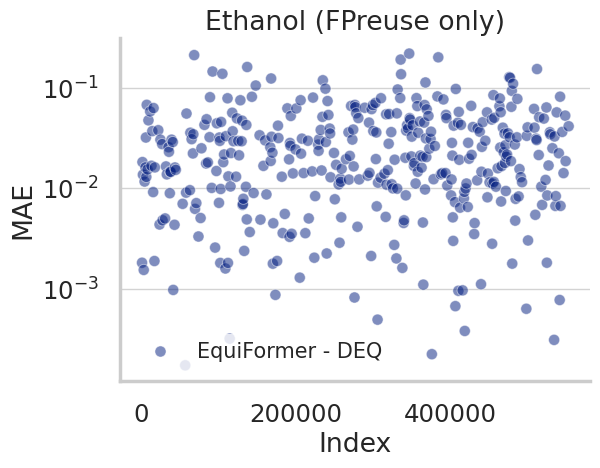

In [8]:
# _dffp = dffp_deq_eth.copy()
# _dffp["f_mae"] = dfall_e2_eth["f_mae"] - dfall_deq_eth["f_mae"]
# _dffp["Model"] = "EquiFormer - DEQ"
# hp.plot_loss_per_idx(_dffp, dfall_deq_eth, datasplit, run_id, logy=True, alpha=0.5)

In [9]:
# print(np.allclose(dffp_deq_eth["idx"].to_numpy(), dffp_e2_eth["idx"].to_numpy()))
# # print(dffp_deq_eth["idx"].head())

# # correlation in f_mae between DEQ and Equiformer
# print(scipy.stats.pearsonr(dffp_deq_eth["f_mae"], dffp_e2_eth["f_mae"]))

# print(
#     f"Mean: DEQ={dffp_deq_eth['f_mae'].mean():.2f} | Equiformer={dffp_e2_eth['f_mae'].mean():.2f}"
# )
# print(
#     f"Std : DEQ={dffp_deq_eth['f_mae'].std():.2f} | Equiformer={dffp_e2_eth['f_mae'].std():.2f}"
# )

# deq_normed = (dffp_deq_eth["f_mae"] - dffp_deq_eth["f_mae"].mean()) / dffp_deq_eth[
#     "f_mae"
# ].std()
# e2_normed = (dffp_e2_eth["f_mae"] - dffp_e2_eth["f_mae"].mean()) / dffp_e2_eth[
#     "f_mae"
# ].std()
# print(scipy.stats.pearsonr(deq_normed, e2_normed))

True
PearsonRResult(statistic=0.9887181526486521, pvalue=0.0)
Mean: DEQ=0.24 | Equiformer=0.22
Std : DEQ=0.92 | Equiformer=0.84
PearsonRResult(statistic=0.9887181526486521, pvalue=0.0)


In [26]:
# gaussian1 = np.random.normal(
#     dffp_deq_eth["f_mae"].mean(), dffp_deq_eth["f_mae"].std(), len(dffp_deq_eth["idx"])
# )
# gaussian2 = np.random.normal(
#     dffp_e2_eth["f_mae"].mean(), dffp_e2_eth["f_mae"].std(), len(dffp_e2_eth["idx"])
# )
# print(scipy.stats.pearsonr(gaussian1, gaussian2))

PearsonRResult(statistic=-0.005088820132315649, pvalue=0.8723120510546317)


In [29]:
# dfall_deq_eth.columns

Index(['idx', 'e_mae', 'f_mae', 'nstep', 'nstep_std', 'nstep_max', 'nstep_min',
       'fpabs', 'fprel', 'forces', 'z', 'Model', 'target', 'f_delta_norm_mean',
       'f_delta_norm', 'f_delta_cos_mean', 'f_delta_cos', 'f_delta_fnorm',
       'f_delta_fnorm_mean', 'f_delta_fnorm_max', 'f_delta_max',
       'f_delta_fnorm_std'],
      dtype='object')

In [40]:
# # avg f_mae if we filter
# _col = "f_mae"
# for method in [dfall_deq_eth, dfall_e2_eth]:
#     error_all = method["f_mae"].mean()
#     _df = hp.filter_quantile(method, q=0.994, col=_col)
#     # _df = hp.filter_z_score(dfall_deq_asp, std=2, abs=False, col="nstep_max")
#     print(f"Filtered up to {_df[_col].max():.2f} {_col}")
#     print(
#         f'Error {method["Model"].iloc[0]} (All, filtered by {_col}): ',
#         f'{_df["f_mae"].mean():.4f} +- {_df["f_mae"].std():.4f}',
#         f" ->  {_df['f_mae'].mean() / error_all:.4f}x reduction",
#     )

Removed 12 outliers.
Filtered up to 1.02 f_mae
Error DEQ (All, filtered by f_mae):  0.1780 +- 0.0826  ->  0.7534x reduction
Removed 12 outliers.
Filtered up to 0.95 f_mae
Error Equ (All, filtered by f_mae):  0.1698 +- 0.0820  ->  0.7679x reduction


In [44]:
# # Can we reduce f_mae by sampling by nstep or another metric?
# error_all = dfall_deq_eth["f_mae"].mean()

# for _col in ["nstep", "nstep_std", "nstep_max", "nstep_min", "f_mae", "fpabs"]:
#     _df = hp.filter_quantile(dfall_deq_eth, q=0.90, col=_col)
#     if len(_df) == 0:
#         continue
#     # _df = hp.filter_z_score(dfall_deq_asp, std=2, abs=False, col="nstep_max")
#     print(f"Filtered up to {_df[_col].max():.2f} {_col}")
#     print(
#         f'Error {_df["Model"].iloc[0]} (All, filtered by {_col}): ',
#         f'{_df["f_mae"].mean():.4f} +- {_df["f_mae"].std():.4f}',
#         f" ->  {_df['f_mae'].mean() / error_all:.4f}x reduction",
#     )

Removed 277 outliers.
Filtered up to 4.78 nstep
Error DEQ (All, filtered by nstep):  0.2343 +- 0.9622  ->  0.9917x reduction
Removed 2000 outliers.
Removed 278 outliers.
Filtered up to 4.00 nstep_max
Error DEQ (All, filtered by nstep_max):  0.2344 +- 0.9624  ->  0.9919x reduction
Removed 275 outliers.
Filtered up to 4.00 nstep_min
Error DEQ (All, filtered by nstep_min):  0.2343 +- 0.9616  ->  0.9914x reduction
Removed 200 outliers.
Filtered up to 0.28 f_mae
Error DEQ (All, filtered by f_mae):  0.1587 +- 0.0475  ->  0.6714x reduction
Removed 240 outliers.
Filtered up to 2439024.75 fpabs
Error DEQ (All, filtered by fpabs):  0.2420 +- 0.9911  ->  1.0242x reduction


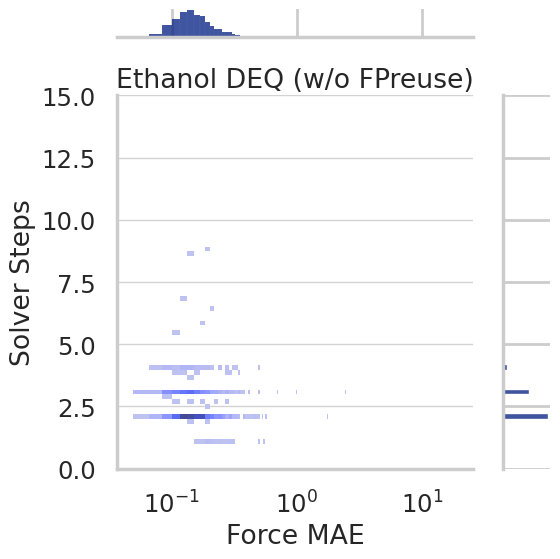

In [11]:
# hp.plot_x_vs_y(
#     dffp_deq_eth,
#     dfall_deq_eth,
#     dataset,
#     datasplit,
#     run_id,
#     style="hist",
#     ymin=0,
#     ymax=15,
# )
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, style="hist", ymin=0, ymax=15, wofpreuse=True)

# # nstep, nstep_std, nstep_max, nstep_min, f_mae, fpabs, fprel
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, x="f_mae", y="nstep_max", style="hist")
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, x="f_mae", y="nstep_min", style="hist")
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, x="f_mae", y="nstep_std", style="hist")
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, x="f_mae", y="fpabs", style="hist")
# # hp.plot_x_vs_y(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, x="f_mae", y="fprel", style="hist")

Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/f_mae_count_test_fpreuse-8epgifsz.png
Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/f_mae_count_test_fpreuse-8epgifsz.png
plot_step_vs_forcedelta: plotting 1000 points.
plot_step_vs_forcedelta: plotting 1000 points.
plot_step_vs_forcedelta: plotting 1000 points.
sample with min nsteps: 73
sample with max nsteps: 823


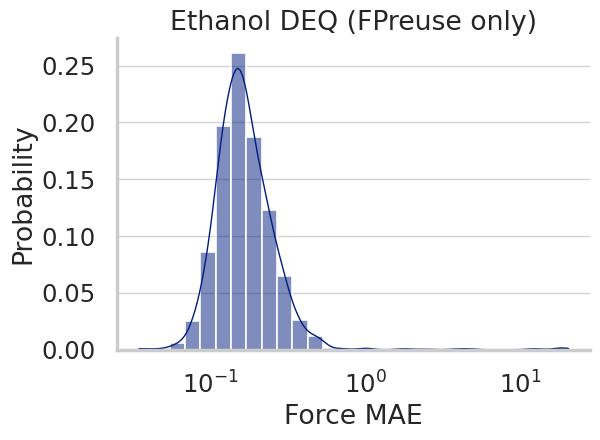

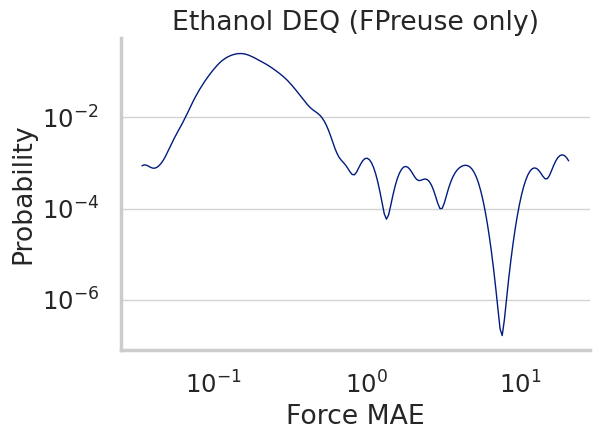

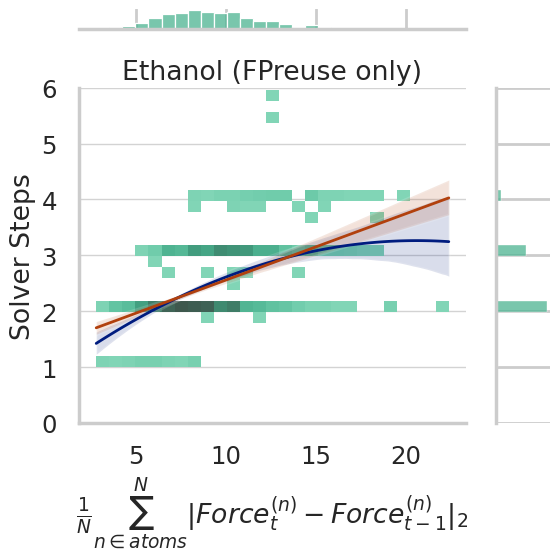

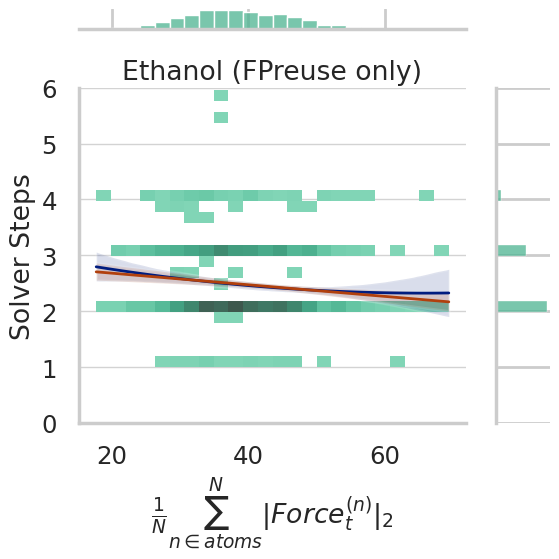

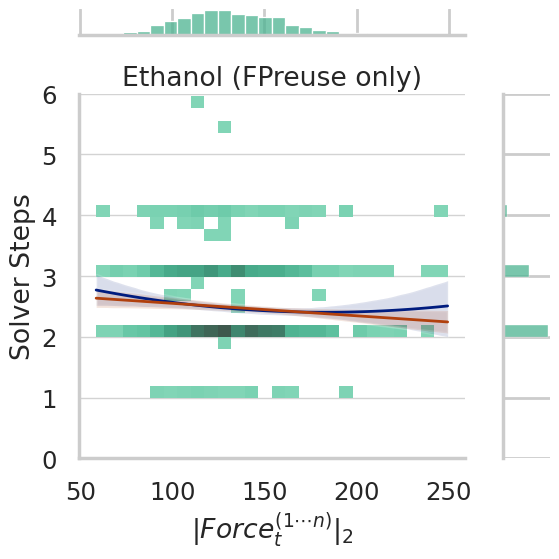

In [12]:
# # distribution over dataset

# hp.plot_fmae_count(
#     dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, wofpreuse=True
# )
# hp.plot_fmae_count(
#     dffp_deq_eth,
#     dfall_deq_eth,
#     dataset,
#     datasplit,
#     run_id,
#     wofpreuse=True,
#     logs=(10, 10),
# )
# # hp.plot_step_count(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id)
# # hp.plot_step_count(dffp_deq_eth, dfall_deq_eth, dataset, datasplit, run_id, wofpreuse=True)

# hp.plot_step_vs_forcedelta(
#     dffp_deq_eth,
#     dfall_deq_eth,
#     dataset,
#     datasplit,
#     run_id,
#     metric="norm_mean",
#     ymin=0,
#     ymax=6,
# )
# hp.plot_step_vs_forcedelta(
#     dffp_deq_eth,
#     dfall_deq_eth,
#     dataset,
#     datasplit,
#     run_id,
#     metric="fnorm_mean",
#     ymin=0,
#     ymax=6,
# )
# hp.plot_step_vs_forcedelta(
#     dffp_deq_eth,
#     dfall_deq_eth,
#     dataset,
#     datasplit,
#     run_id,
#     metric="fnorm",
#     ymin=0,
#     ymax=6,
# )
# # hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="norm")
# # hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="cos_mean")
# # hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="cos")

# # plot the molecule

# # idx can be used for both df, as long as we don't use .reset_index()
# # dffp_deq_eth.iloc[idx] == dffp_deq_eth.iloc[idx]
# idx = dffp_deq_eth["nstep"].idxmin()
# # idx = dffp_deq_eth["nstep"].idxmin()
# # idx = dffp_deq_eth["f_mae"].idxmin()
# # idx = dffp_deq_eth["f_mae"].idxmax()
# # fig = plot_mol_plt(idx, df, dataset, datasplit, run_id, side_by_side=False)
# # hp.plot_model_py3d(idx, df, dataset, datasplit, run_id)
# print("sample with min nsteps:", idx)
# # hp.plot_model_py3d(idx, dfall_deq_eth, dataset, datasplit, run_id, next=True)

# idx = dffp_deq_eth["nstep"].idxmax()
# print("sample with max nsteps:", idx)
# # hp.plot_model_py3d(idx, dfall_deq_eth, dataset, datasplit, run_id, next=True)

# Aspirin

In [13]:
# DEQc brnull inf-bs1 testpatches-10000 testsize-2
# https://wandb.ai/andreas-burger/EquilibriumEquiFormer/runs/wfgu5f8z
run_id = "wfgu5f8z"

# DEQs ar2dnull 101n22nc
# run_id = "101n22nc"


dffp_deq_asp, dfall_deq_asp, dataset = hp.get_data(run_id, datasplit)

filename: /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plot_loss_per_idx/run-wfgu5f8z-idx_table_test_fpreuse.pkl
Loading dataset...
Found ['datasets/md17/aspirin/raw/md17_aspirin.npz'] files, skipping download
Found ['datasets/md17/aspirin/processed/md17-aspirin.pt'] files, skipping process
Dataset: Using consecutive order
Loading data from /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plot_loss_per_idx/run-wfgu5f8z-idx_table_test_fpreuse.pkl
Removing non-fpreuse rows...
patch_size=2
len(df) before filtering: 20000
len(df) fpreuse only    : 10000


In [14]:
# Error in fpreuse samples:
print("Error (FPreuse): ", dffp_deq_asp["f_mae"].mean())
# Error in all samples:
print("Error (All): ", dfall_deq_asp["f_mae"].mean())
# filter out high error samples
_df = hp.filter_quantile(dfall_deq_asp, q=0.99)
print("Error (All, filtered): ", f'{_df["f_mae"].mean():.2f}')
_df = hp.filter_z_score(dfall_deq_asp, std=2, abs=False)
print("Error (All, filtered by zscore): ", f'{_df["f_mae"].mean():.2f}')

Error (FPreuse):  0.4817711857837159
Error (All):  0.4821209999389248
Removed 200 outliers.
Error (All, filtered):  0.44
Removed 221 outliers.
Error (All, filtered by zscore):  0.44


In [15]:
# Can we reduce f_mae by sampling by nstep or another metric?
_df = hp.filter_quantile(dfall_deq_asp, q=0.90, col="nstep")
print("Error (All, filtered): ", f'{_df["f_mae"].mean():.2f}')
_df = hp.filter_z_score(dfall_deq_asp, std=2, abs=False, col="nstep")
print("Error (All, filtered by zscore): ", f'{_df["f_mae"].mean():.2f}')

Removed 6231 outliers.
Error (All, filtered):  0.46
Removed 319 outliers.
Error (All, filtered by zscore):  0.47


Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/step_count_test_fpreuse-wfgu5f8z.png
Saved plot to
 /ssd/gen/equilibrium-forcefields/src/deq2ff/plotting/plots/f_mae_count_test_fpreuse-wfgu5f8z.png
plot_step_vs_forcedelta: plotting 10000 points.
plot_step_vs_forcedelta: plotting 10000 points.


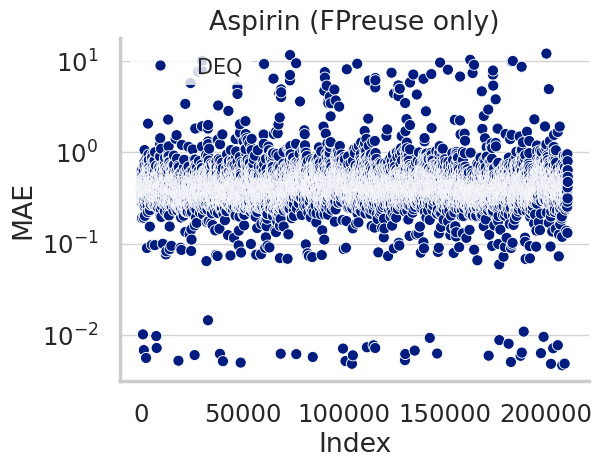

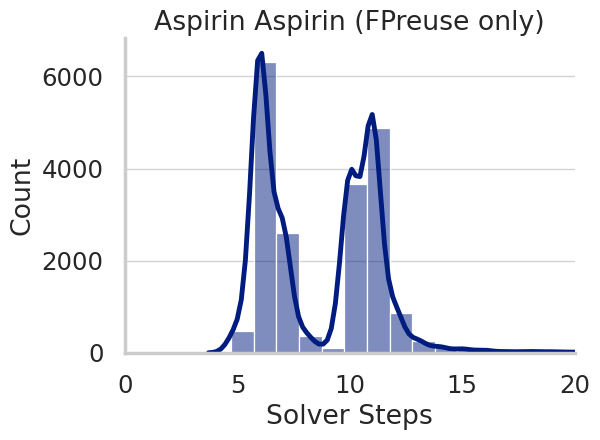

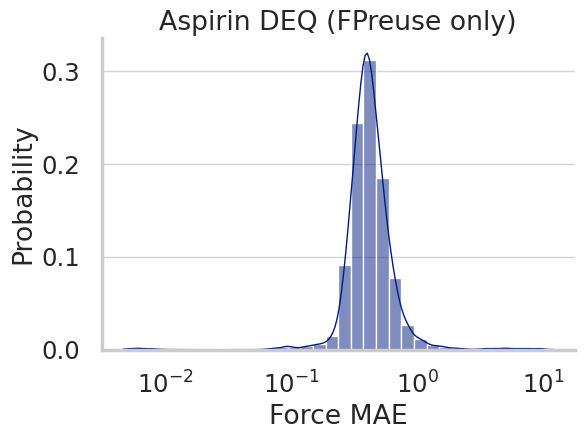

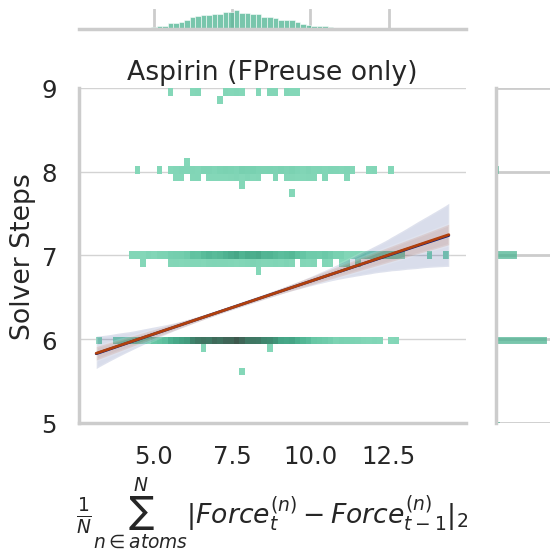

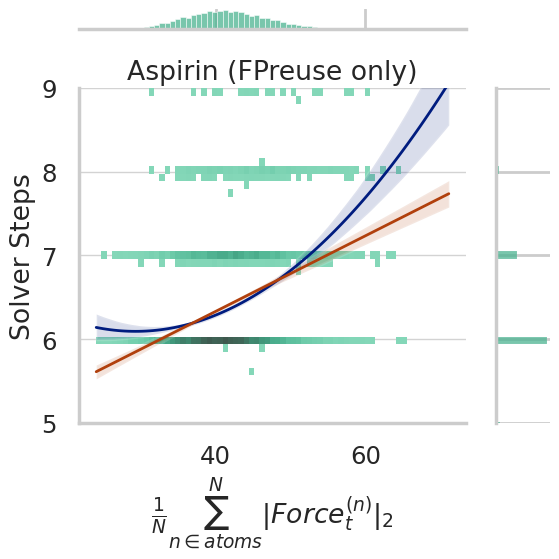

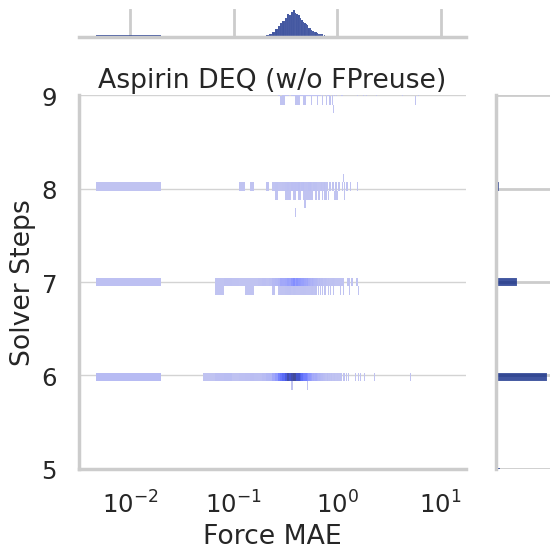

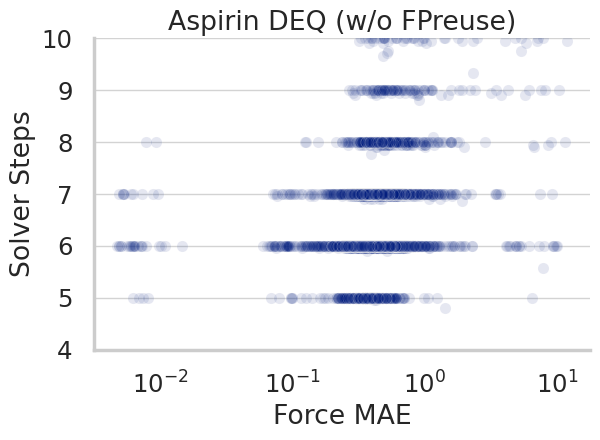

In [16]:
# distribution over dataset
hp.plot_loss_per_idx(dffp_deq_asp, dfall_deq_asp, datasplit, run_id, logy=True)
hp.plot_step_count(
    dffp_deq_asp, dfall_deq_asp, dataset, datasplit, run_id, wofpreuse=True
)
hp.plot_fmae_count(
    dffp_deq_asp, dfall_deq_asp, dataset, datasplit, run_id, wofpreuse=True
)
hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="norm_mean",
    ymin=5,
    ymax=9,
)
hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="fnorm_mean",
    ymin=5,
    ymax=9,
)
# hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="norm")
# hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="cos_mean")
# hp.plot_step_vs_forcedelta(dffp, df, dataset, datasplit, run_id, metric="cos")

hp.plot_x_vs_y(dffp_deq_asp, dfall_deq_asp, dataset, datasplit, run_id, ymin=5, ymax=9)
hp.plot_x_vs_y(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    style="scatter",
    ymin=4,
    ymax=10,
)

In [17]:
# plot the molecule
dffpsorted = dffp_deq_asp["nstep"].sort_values()
idx = dffpsorted.index[0]
# idx = dffp_deq_asp["f_mae"].idxmin()
# idx = dffp_deq_asp["f_mae"].idxmax()
# fig = plot_mol_plt(idx, df, dataset, datasplit, run_id, side_by_side=False)
# hp.plot_model_py3d(idx, df, dataset, datasplit, run_id)
print("sample with min nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"])
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

# second smallest step
idx = dffpsorted.index[1]
print(
    "sample with second fewest nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"]
)
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

idx = dffpsorted.index[-1]
print("sample with max nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"])
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

# second largest step
idx = dffpsorted.index[-2]
print(
    "sample with second most nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"]
)
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

sample with min nsteps: 4511 | nsteps: 3.7142858505249023
sample with second fewest nsteps: 13281 | nsteps: 4.809524059295654
sample with max nsteps: 2183 | nsteps: 35.66666793823242
sample with second most nsteps: 18987 | nsteps: 35.57143020629883


In [18]:
# filter dffp to remove outliers
dffp_backup = copy.deepcopy(dffp_deq_asp)
# dffp = hp.filter_z_score(dffp, col="f_mae")
# dffp = hp.filter_quantile(dffp_backup, col="nstep", q=0.99)
dffp_deq_asp = hp.filter_quantile_lower_upper(dffp_backup, col="nstep", q=0.999)

Removed 492 outliers.


In [19]:
# plot the molecule
dffpsorted = dffp_deq_asp["nstep"].sort_values()
idx = dffpsorted.index[0]
# idx = dffp_deq_asp["f_mae"].idxmin()
# idx = dffp_deq_asp["f_mae"].idxmax()
# fig = plot_mol_plt(idx, df, dataset, datasplit, run_id, side_by_side=False)
# hp.plot_model_py3d(idx, df, dataset, datasplit, run_id)
print("sample with min nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"])
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

# second smallest step
idx = dffpsorted.index[1]
print(
    "sample with second fewest nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"]
)
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

idx = dffpsorted.index[-1]
print("sample with max nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"])
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

# second largest step
idx = dffpsorted.index[-2]
print(
    "sample with second most nsteps:", idx, "| nsteps:", dffp_deq_asp.at[idx, "nstep"]
)
# hp.plot_model_py3d(idx, dfall_deq_asp, dataset, datasplit, run_id, next=True)

sample with min nsteps: 2829 | nsteps: 5.5714287757873535
sample with second fewest nsteps: 15123 | nsteps: 5.904761791229248
sample with max nsteps: 4697 | nsteps: 20.666667938232422
sample with second most nsteps: 2851 | nsteps: 19.952381134033203


plot_step_vs_forcedelta: plotting 9508 points.
plot_step_vs_forcedelta: plotting 9508 points.
plot_step_vs_forcedelta: plotting 9508 points.
plot_step_vs_forcedelta: plotting 9508 points.
plot_step_vs_forcedelta: plotting 9508 points.


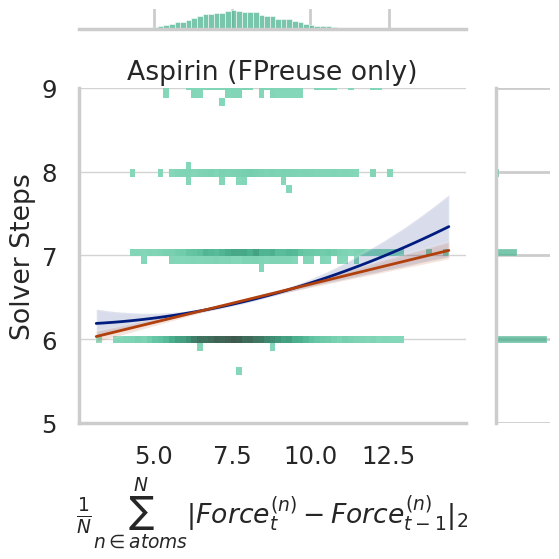

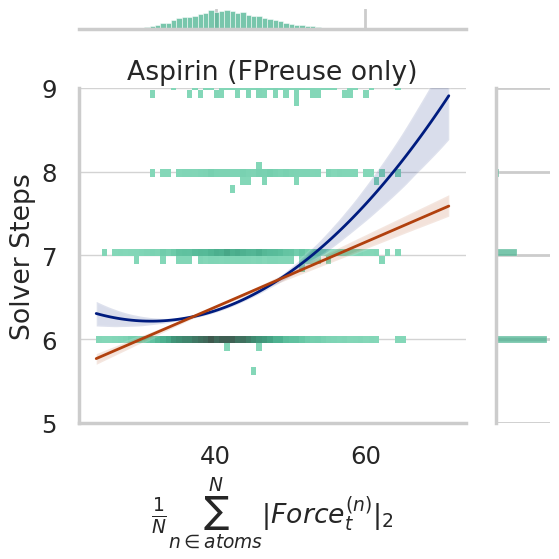

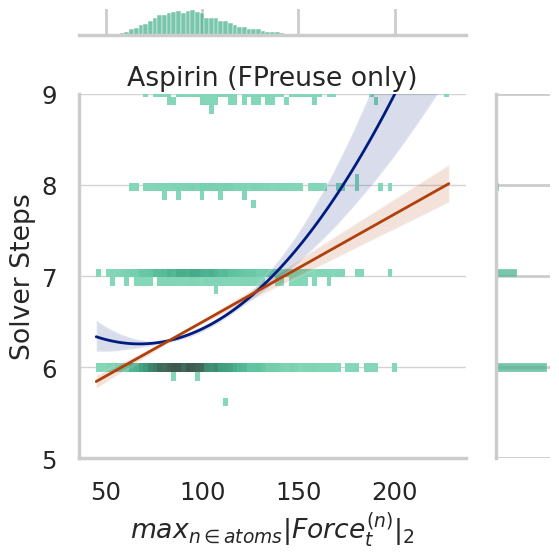

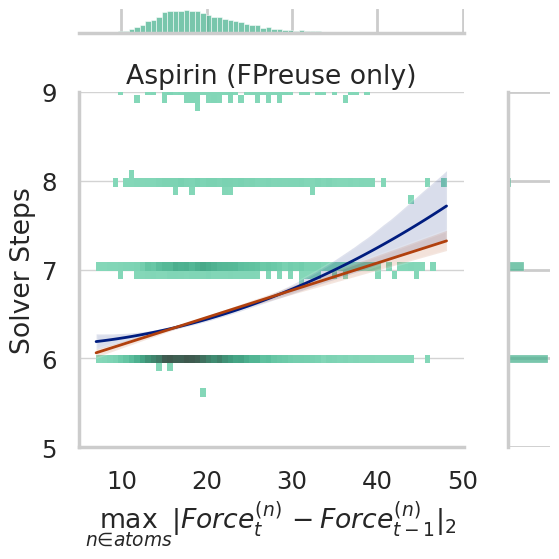

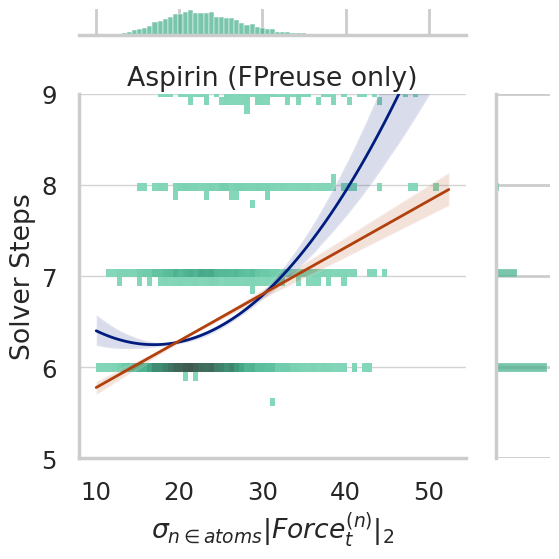

In [20]:
hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="norm_mean",
    ymin=5,
    ymax=9,
)
# hp.plot_step_vs_forcedelta(dffp_deq_asp, dfall_deq_asp, dataset, datasplit, run_id, metric="norm_mean", style="scatter")

hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="fnorm_mean",
    ymin=5,
    ymax=9,
)
# hp.plot_step_vs_forcedelta(dffp_deq_asp, dfall_deq_asp, dataset, datasplit, run_id, metric="fnorm_mean", style="scatter")

hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="fnorm_max",
    ymin=5,
    ymax=9,
)
hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="max",
    ymin=5,
    ymax=9,
)
hp.plot_step_vs_forcedelta(
    dffp_deq_asp,
    dfall_deq_asp,
    dataset,
    datasplit,
    run_id,
    metric="fnorm_std",
    ymin=5,
    ymax=9,
)

In [21]:
# Can we reduce f_mae by sampling by nstep or another metric?
error_all = dfall_deq_asp["f_mae"].mean()

_df = hp.filter_quantile(dfall_deq_asp, q=0.90, col="nstep")
# _df = hp.filter_z_score(dfall_deq_asp, std=2, abs=False, col="nstep_max")
print(
    "Error (All, filtered): ",
    f'{_df["f_mae"].mean():.2f}',
    f" ->  {_df['f_mae'].mean() / error_all:.2f}x reduction",
)

# fpabs, fprel, nstep_max
# _df = hp.filter_quantile(dfall_deq_asp, q=0.90, col="nstep_max")
# print('Error (All, filtered by zscore): ', f'{_df["f_mae"].mean():.2f}', f" ->   {_df['f_mae'].mean() / error_all:.2f}x reduction")
# _df = hp.filter_quantile(dfall_deq_asp, q=0.90, col="fpabs")
# print('Error (All, filtered by zscore): ', f'{_df["f_mae"].mean():.2f}', f" ->   {_df['f_mae'].mean() / error_all:.2f}x reduction")
# _df = hp.filter_quantile(dfall_deq_asp, q=0.90, col="fprel")
# print('Error (All, filtered by zscore): ', f'{_df["f_mae"].mean():.2f}', f" ->   {_df['f_mae'].mean() / error_all:.2f}x reduction")

Removed 6231 outliers.
Error (All, filtered):  0.46  ->  0.95x reduction
